Ricardo González Leal A01639036

# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The cartwheel dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [343]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [344]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower_Name"]

# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url, header = None, names = colnames )

dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower_Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [345]:
print(dataset.shape)

dataset.head()

(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower_Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values

In [346]:
dataset = dataset.dropna()

print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [347]:
# Encoding the categorical column
dataset = dataset.replace({"Flower_Name":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower_Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


4. Discard columns that won't be used


In [348]:
# Drop out non necesary columns
dataset2 = dataset
dataset1 = dataset.drop(['Petal_Length', 'Petal_Width'],axis=1)
dataset = dataset.drop(['Sepal_Length', 'Sepal_Width'],axis=1)


#Visualize the dataset
dataset
dataset2


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower_Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [349]:
dataset1

,Sepal_Length,Sepal_Width,Flower_Name
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


5. Scatter plot of the data

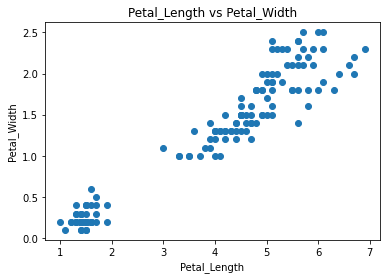

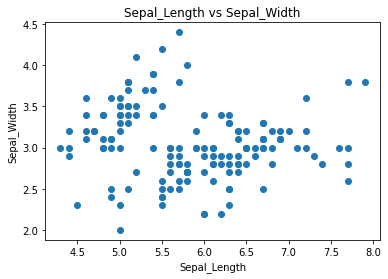

In [350]:
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.title('Petal_Length vs Petal_Width')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.show()


plt.scatter(dataset1.Sepal_Length,dataset1.Sepal_Width)
plt.title('Sepal_Length vs Sepal_Width')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

<ipython-input-351-386aa7a1bb66>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Iris-Setosa')
<ipython-input-351-386aa7a1bb66>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Iris-Versicolor')
<ipython-input-351-386aa7a1bb66>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Iris-Virginica')


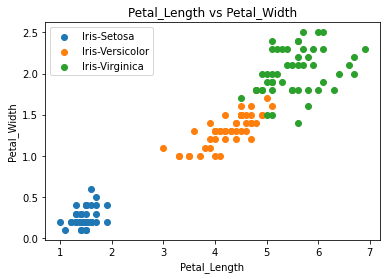

<ipython-input-351-386aa7a1bb66>:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Iris-Setosa')
<ipython-input-351-386aa7a1bb66>:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Iris-Versicolor')
<ipython-input-351-386aa7a1bb66>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Iris-Virginica')


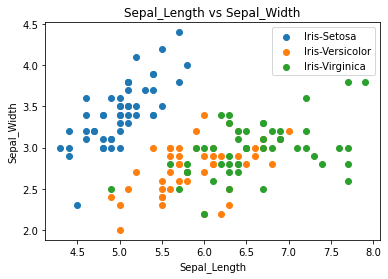

In [351]:
df1 = dataset[dataset.Flower_Name==0]
df2 = dataset[dataset.Flower_Name==1]
df3 = dataset[dataset.Flower_Name==2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Iris-Setosa')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Iris-Versicolor')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Iris-Virginica')

plt.title('Petal_Length vs Petal_Width')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()

df1 = dataset1[dataset.Flower_Name==0]
df2 = dataset1[dataset.Flower_Name==1]
df3 = dataset1[dataset.Flower_Name==2]

plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Iris-Setosa')
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Iris-Versicolor')
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Iris-Virginica')

plt.title('Sepal_Length vs Sepal_Width')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [352]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
kmpetal = KMeans(n_clusters=3)
kmsepal = KMeans(n_clusters=3)
km = KMeans(n_clusters=3)


# Do K-means clustering (assing each point in the dataset to a cluster)
ypetal = kmpetal.fit_predict(dataset[['Petal_Length','Petal_Width']])
ysetal = kmsepal.fit_predict(dataset1[['Sepal_Length','Sepal_Width']])
yp = km.fit_predict(dataset2[['Petal_Length','Petal_Width','Sepal_Length','Sepal_Width']])
# Print estimated cluster of each point in the dataser
print(ypetal)
print(ysetal)
print(yp)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [353]:
# Add a new column to the dataset with the cluster information
dataset['Cluster_Type'] = ypetal
dataset1['Cluster_Type'] = ysetal
dataset2['Cluster_Type'] = yp

# Visualize the dataset
dataset

,Petal_Length,Petal_Width,Flower_Name,Cluster_Type
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1
...,...,...,...,...
145,5.2,2.3,2,0
146,5.0,1.9,2,0
147,5.2,2.0,2,0
148,5.4,2.3,2,0


In [354]:
# Visualize the ID of the clusters
print(dataset.Cluster_Type.unique())
print(dataset1.Cluster_Type.unique())
print(dataset2.Cluster_Type.unique())

[1 2 0]
[1 0 2]
[1 2 0]


In [355]:
# Center of each cluster
print(kmpetal.cluster_centers_)
print(kmsepal.cluster_centers_)
print(km.cluster_centers_)

[[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]
[[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]]
[[5.74210526 2.07105263 6.85       3.07368421]
 [1.462      0.246      5.006      3.428     ]
 [4.39354839 1.43387097 5.9016129  2.7483871 ]]


In [356]:
# Sum of squared error
print(kmpetal.inertia_)
print(kmsepal.inertia_)
print(km.inertia_)

31.371358974358966
37.0507021276596
78.851441426146


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

<ipython-input-357-834b7acd0501>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Estimated Type Iris-Setosa')
<ipython-input-357-834b7acd0501>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Estimated Type Iris-Versicolor')
<ipython-input-357-834b7acd0501>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Estimated Type Iris-Virginica')


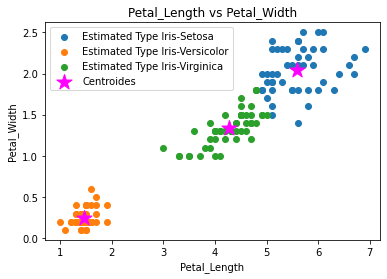

In [357]:
df1 = dataset[dataset.Cluster_Type==0]
df2 = dataset[dataset.Cluster_Type==1]
df3 = dataset[dataset.Cluster_Type==2]


plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Estimated Type Iris-Setosa')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Estimated Type Iris-Versicolor')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Estimated Type Iris-Virginica')
plt.scatter(kmpetal.cluster_centers_[:,0], kmpetal.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal_Length vs Petal_Width')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()

<ipython-input-358-76ca77fc04af>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Estimated Type Iris-Setosa')
<ipython-input-358-76ca77fc04af>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df4.Sepal_Length, df4.Sepal_Width, Label='Estimated Type Iris-Versicolor')
<ipython-input-358-76ca77fc04af>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df5.Sepal_Length, df5.Sepal_Width, Label='Estimated Type Iris-Virginica')


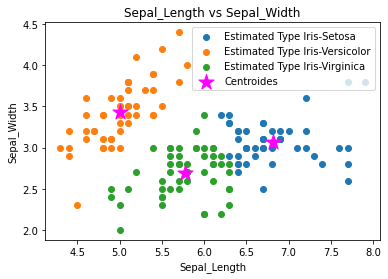

In [358]:
df3 = dataset1[dataset1.Cluster_Type==0]
df4 = dataset1[dataset1.Cluster_Type==1]
df5 = dataset1[dataset1.Cluster_Type==2]

plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Estimated Type Iris-Setosa')
plt.scatter(df4.Sepal_Length, df4.Sepal_Width, Label='Estimated Type Iris-Versicolor')
plt.scatter(df5.Sepal_Length, df5.Sepal_Width, Label='Estimated Type Iris-Virginica')
plt.scatter(kmsepal.cluster_centers_[:,0], kmsepal.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Sepal_Length vs Sepal_Width')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

Plot real clusters and visual comparison

<ipython-input-359-60c55171e0bb>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Type Iris-Setosa Cluster')
<ipython-input-359-60c55171e0bb>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Type Iris-Versicolor Cluster')
<ipython-input-359-60c55171e0bb>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Type Iris-Virginica Cluster')


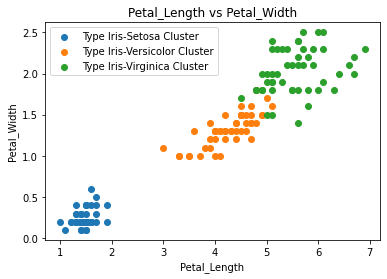

In [359]:
df1 = dataset[dataset.Flower_Name==0]
df2 = dataset[dataset.Flower_Name==1]
df3 = dataset[dataset.Flower_Name==2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Type Iris-Setosa Cluster')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Type Iris-Versicolor Cluster')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Type Iris-Virginica Cluster')
plt.title('Petal_Length vs Petal_Width')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()


<ipython-input-360-9fee3546ff12>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Estimated Type Iris-Setosa')
<ipython-input-360-9fee3546ff12>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Estimated Type Iris-Versicolor')
<ipython-input-360-9fee3546ff12>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Estimated Type Iris-Virginica')


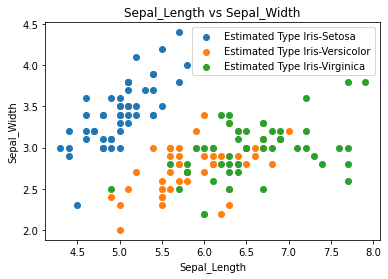

In [360]:
df1 = dataset1[dataset1.Flower_Name==0]
df2 = dataset1[dataset1.Flower_Name==1]
df3 = dataset1[dataset1.Flower_Name==2]

plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Estimated Type Iris-Setosa')
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Estimated Type Iris-Versicolor')
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Estimated Type Iris-Virginica')

plt.title('Sepal_Length vs Sepal_Width')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [361]:
ssePetal = []
k_rngPetal = range(1,10)
for k in k_rngPetal:
    kmpetal = KMeans(n_clusters=k)
    kmpetal.fit_predict(dataset[['Petal_Length','Petal_Width']])
    ssePetal.append(kmpetal.inertia_)

C:\Users\ricar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


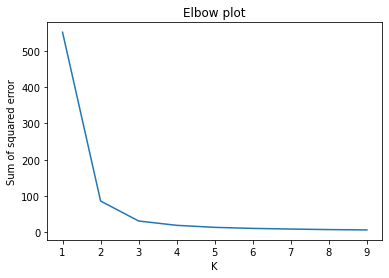

In [362]:
plt.plot(k_rngPetal,ssePetal)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

In [363]:
sseSepal = []
k_rngSepal = range(1,10)
for k in k_rngSepal:
    kmsepal = KMeans(n_clusters=k)
    kmsepal.fit_predict(dataset1[['Sepal_Length','Sepal_Width']])
    sseSepal.append(kmsepal.inertia_)

C:\Users\ricar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


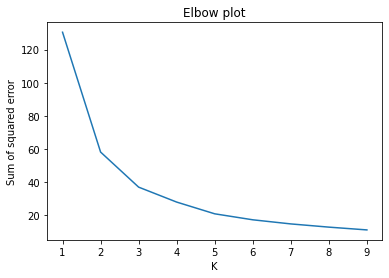

In [364]:
plt.plot(k_rngSepal,sseSepal)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

C:\Users\ricar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


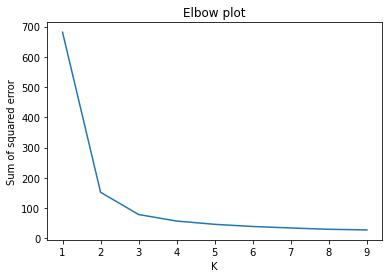

In [365]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset2[['Petal_Length','Petal_Width','Sepal_Length','Sepal_Width']])
    sse.append(km.inertia_)

plt.plot(k_rng, sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

 - For the following cases, do Kmean and without using min max scaling: determine whether the scaling benefits or not
 
 - Also, compute and show the elbow plot
    
1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.
Done

2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.
Done

3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible
Done




5. Draw conclusiones:
    - About the scalling: does it helps or not? 
    Sí ayuda, ya que ver de manera gráfica en dónde se encuentran los datos ayudan a tener una idea más clara de las agrupaciones.
    - About the elbow plot: does the K agree with the real number of clusters?
    Sí concuerda, ya que en las gráficas de Elbow Plot, se puede observar que el número de clusters es aproximadamente 3, el cual es el mismo que se puede ver anteriormente con las gráficas del scatter plot.  
    
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?
    Considero que el mejor de todos es el de las características del pétalo; ya que simplemente al observar el gráfico realizado con el skaterplot se puede observar que los datos de los 3 tipos de flores están muy bien agrupadas y no se enciman datos de un tipo con otra, lo cual si sucede en el de las características del sétalo; y consecuéntemente también sucedería en el kmeans de todas las características. 
    